In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as rm
import imageio

What is the long-term behaviour of Markov chains? Let's look at random walks on graphs for the moment and consider the following graph on 10 vertices.

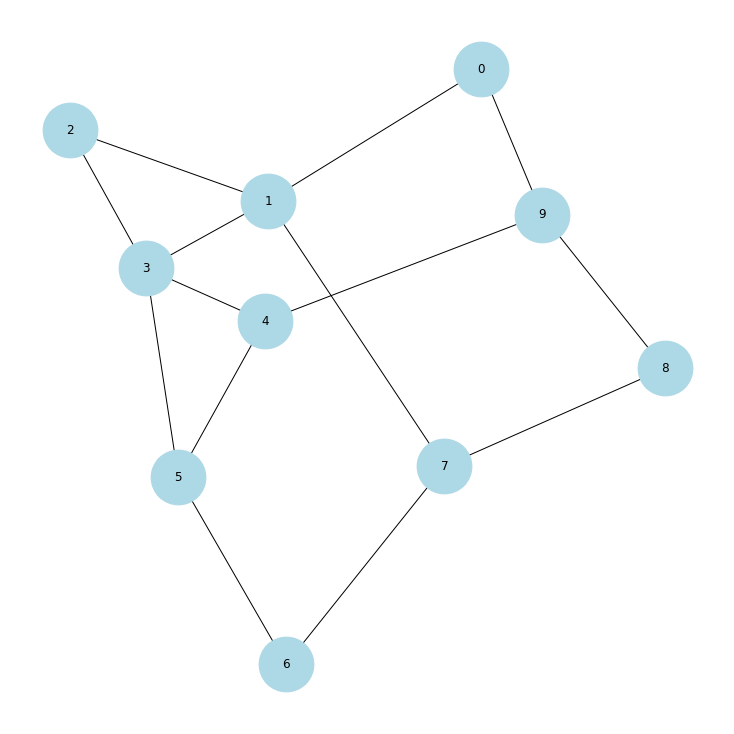

In [4]:
G = nx.cycle_graph(10)
G.add_edges_from([(1,3), (1,7), (3, 5), (4,9)])
plt.figure(figsize = (10,10))
nx.draw_spectral(G, node_size = 3000, node_color = "lightblue", with_labels = True)

What is the transition matrix? For formatting I'll round the entries to two decimal places:

In [3]:
A = nx.adjacency_matrix(G).toarray()
degsIn = [G.degree(v)**-1 for v in G.nodes()]
P = np.matmul( np.diag(degsIn), A)
Pround = np.around(P,2)
print(Pround)

[[0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.5 ]
 [0.25 0.   0.25 0.25 0.   0.   0.   0.25 0.   0.  ]
 [0.   0.5  0.   0.5  0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.25 0.   0.25 0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.33 0.   0.33 0.   0.   0.   0.33]
 [0.   0.   0.   0.33 0.33 0.   0.33 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.5  0.   0.5  0.   0.  ]
 [0.   0.33 0.   0.   0.   0.   0.33 0.   0.33 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.5 ]
 [0.33 0.   0.   0.   0.33 0.   0.   0.   0.33 0.  ]]


Let's generate a random initial distribution:

In [4]:
mu = np.array([np.random.poisson(2) for j in range(10)])
mu = mu/np.sum(mu)
print(np.around(mu,2))

[0.05 0.1  0.05 0.15 0.05 0.1  0.05 0.15 0.15 0.15]


What is the behavior of the *law* after 100 rounds? Below will write 
$$
\mathbb{P}(X_{100} = x) \qquad \text{ when }\qquad \mathbb{P}(X_0 = x) = \mu_x.
$$

In [5]:
print(np.around(np.matmul(mu, np.linalg.matrix_power(P,100)),2))

[0.07 0.14 0.07 0.14 0.11 0.11 0.07 0.11 0.07 0.11]


If we do it again?

In [6]:
mu = np.array([np.random.uniform(0,1) for j in range(10)])
mu = mu/np.sum(mu)
print(np.around(mu,2))
print(np.around(np.matmul(mu, np.linalg.matrix_power(P,100)),2))

[0.1  0.06 0.01 0.07 0.2  0.1  0.04 0.07 0.19 0.17]
[0.07 0.14 0.07 0.14 0.11 0.11 0.07 0.11 0.07 0.11]


It is the same!

What about a different graph? $G$ is the Petersen Graph:

[[0.   0.33 0.   0.   0.33 0.33 0.   0.   0.   0.  ]
 [0.33 0.   0.33 0.   0.   0.   0.33 0.   0.   0.  ]
 [0.   0.33 0.   0.33 0.   0.   0.   0.33 0.   0.  ]
 [0.   0.   0.33 0.   0.33 0.   0.   0.   0.33 0.  ]
 [0.33 0.   0.   0.33 0.   0.   0.   0.   0.   0.33]
 [0.33 0.   0.   0.   0.   0.   0.   0.33 0.33 0.  ]
 [0.   0.33 0.   0.   0.   0.   0.   0.   0.33 0.33]
 [0.   0.   0.33 0.   0.   0.33 0.   0.   0.   0.33]
 [0.   0.   0.   0.33 0.   0.33 0.33 0.   0.   0.  ]
 [0.   0.   0.   0.   0.33 0.   0.33 0.33 0.   0.  ]]


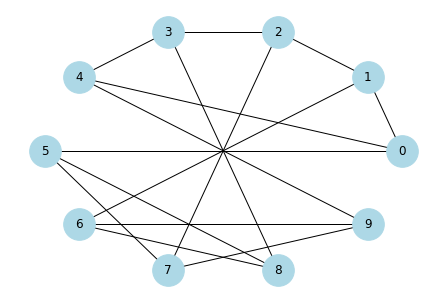

In [7]:
G = nx.petersen_graph()
A = nx.adjacency_matrix(G).toarray()
degsIn = [G.degree(v)**-1 for v in G.nodes()]
P = np.matmul( np.diag(degsIn), A)
print(np.around(P,2))
nx.draw_circular(G,node_size = 1000, node_color = "lightblue", with_labels = True)

In [7]:
for j in range(5):
    mu = np.array([np.random.uniform(0,1) for j in range(10)])
    mu = mu/np.sum(mu)
    print('mu:  '+ str(np.round(mu,2)))
    print('muP^100:  ' + str(np.around(np.matmul(mu, np.linalg.matrix_power(P,100)),2)))

mu:  [0.06 0.06 0.18 0.03 0.1  0.16 0.13 0.07 0.14 0.08]
muP^100:  [0.07 0.14 0.07 0.14 0.11 0.11 0.07 0.11 0.07 0.11]
mu:  [0.17 0.15 0.12 0.03 0.13 0.1  0.05 0.18 0.06 0.  ]
muP^100:  [0.07 0.14 0.07 0.14 0.11 0.11 0.07 0.11 0.07 0.11]
mu:  [0.15 0.12 0.05 0.04 0.1  0.18 0.19 0.15 0.02 0.  ]
muP^100:  [0.07 0.14 0.07 0.14 0.11 0.11 0.07 0.11 0.07 0.11]
mu:  [0.03 0.12 0.06 0.18 0.11 0.02 0.16 0.06 0.16 0.09]
muP^100:  [0.07 0.14 0.07 0.14 0.11 0.11 0.07 0.11 0.07 0.11]
mu:  [0.14 0.16 0.23 0.02 0.12 0.01 0.02 0.14 0.13 0.02]
muP^100:  [0.07 0.14 0.07 0.14 0.11 0.11 0.07 0.11 0.07 0.11]


Let's simulate this a walk on the graph. From the first example above:

[0.12 0.08 0.12 0.08 0.2  0.2  0.04 0.08 0.04 0.04]
[[0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.5 ]
 [0.25 0.   0.25 0.25 0.   0.   0.   0.25 0.   0.  ]
 [0.   0.5  0.   0.5  0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.25 0.   0.25 0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.33 0.   0.33 0.   0.   0.   0.33]
 [0.   0.   0.   0.33 0.33 0.   0.33 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.5  0.   0.5  0.   0.  ]
 [0.   0.33 0.   0.   0.   0.   0.33 0.   0.33 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.5 ]
 [0.33 0.   0.   0.   0.33 0.   0.   0.   0.33 0.  ]]


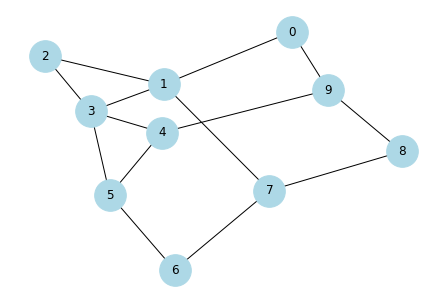

In [8]:
G = nx.cycle_graph(10)
G.add_edges_from([(1,3), (1,7), (3, 5), (4,9)])
nx.draw_spectral(G, node_size = 1000, node_color = "lightblue", with_labels = True)
mu = np.array([np.random.poisson(2) for j in range(10)])
mu = mu/np.sum(mu)
print(np.around(mu,2))
A = nx.adjacency_matrix(G).toarray()
degsIn = [G.degree(v)**-1 for v in G.nodes()]
P = np.matmul( np.diag(degsIn), A)
Pround = np.around(P,2)
print(Pround)

Let's generate an initial state from the above (random) choice of $\boldsymbol\mu$. 

In [13]:
X_init = np.random.choice([j for j in range(10)], p =mu)
print(X_init)

2


In [14]:
Tend = 100
X = [X_init]
for t in range(0, Tend):
    Xlast = X[-1]
    Xnew = np.random.choice([j for j in range(10)], p = P[Xlast,:])
    X.append(Xnew)

In [9]:
'''
positions = nx.spectral_layout(G)
images = []
filenames = ['step_'+str(k)+'.png' for k in range(Tend)]

my_colors = []
for k in range(Tend):
    colorTemp = [ "lightblue" for v in range(10)]
    colorTemp[X[k]] = "pink"
    my_colors.append(colorTemp)
    
for t in range(Tend):
    nx.draw(G, node_size = 1000, node_color = my_colors[t], with_labels = True, pos = positions)
    plt.savefig("gif/fig"+str(t)+".png")
    plt.clf()
'''

'\npositions = nx.spectral_layout(G)\nimages = []\nfilenames = [\'step_\'+str(k)+\'.png\' for k in range(Tend)]\n\nmy_colors = []\nfor k in range(Tend):\n    colorTemp = [ "lightblue" for v in range(10)]\n    colorTemp[X[k]] = "pink"\n    my_colors.append(colorTemp)\n    \nfor t in range(Tend):\n    nx.draw(G, node_size = 1000, node_color = my_colors[t], with_labels = True, pos = positions)\n    plt.savefig("gif/fig"+str(t)+".png")\n    plt.clf()\n'

In [11]:
'''
images = []
file_names = ["gif/fig"+str(t)+".png" for t in range(Tend)]
for filename in file_names:
    images.append(imageio.imread(filename))
imageio.mimsave('Walk.gif',images, fps = 2 )
'''

'\nimages = []\nfile_names = ["gif/fig"+str(t)+".png" for t in range(Tend)]\nfor filename in file_names:\n    images.append(imageio.imread(filename))\nimageio.mimsave(\'Walk.gif\',images, fps = 2 )\n'

In [24]:
trials = 1000
X_init = [np.random.choice([j for j in range(10)], p =mu) for s in range(trials)]

Tend = 100
X = [X_init]
for t in range(0, Tend):
    Xlast = X[-1]
    z = []
    for s in range(trials):
        Xnew = np.random.choice([j for j in range(10)], p = P[Xlast[s],:])
        z.append(Xnew)
    X.append(z)

Z = []
for t in range(Tend):
    z = [np.sum([x==j for x in X[t]])/trials for j in range(10)]
    if t == 0:
        Z.append(z)
    else:
        Z.append(np.array(z)/(t+1) + t*np.array(Z[-1])/(t+1))


In [25]:
for t in range(Tend):
    plt.figure(figsize = (10,10))
    plt.ylim(0,.2)
    plt.plot([j for j in range(10)],Z[t])
    plt.savefig("gif/new"+str(t)+".png")
    plt.clf()
images = []
file_names = ["gif/new"+str(t)+".png" for t in range(Tend)]
for filename in file_names:
    images.append(imageio.v2.imread(filename))
imageio.mimsave('ergodic.gif',images, fps = 2 )

C:\Users\david\AppData\Local\Temp\ipykernel_23404\415923838.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [35]:
XX = [x[0] for x in X]
for t in range(50):
    plt.figure(figsize = (10,10))
    plt.hist(XX[0:t], bins = [j for j in range(10)], density = True)
    plt.ylim(0,.3)
    plt.savefig("gif/new"+str(t)+".png")
    plt.clf()
images = []
file_names = ["gif/new"+str(t)+".png" for t in range(Tend)]
for filename in file_names:
    images.append(imageio.v2.imread(filename))
imageio.mimsave('hist.gif',images, fps = 2 )

C:\Users\david\AppData\Local\Temp\ipykernel_23404\1739443029.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

(array([ 8., 14.,  6., 13., 15., 11.,  6.,  8., 20.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

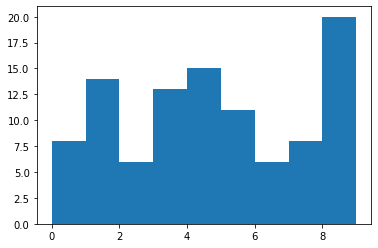

In [30]:
plt.hist(XX,bins = [j for j in range(10)])